# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [1]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

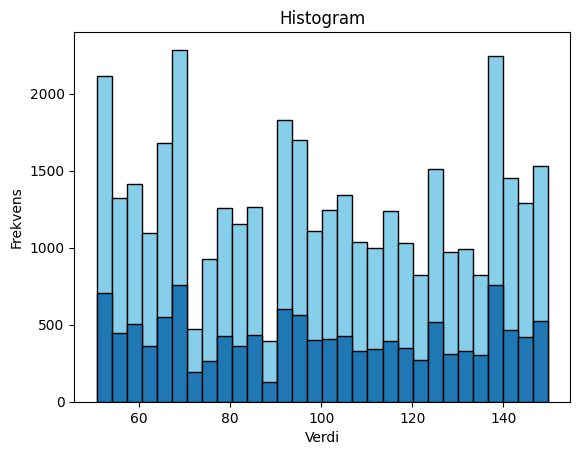

In [3]:
#TODO: visualiser y_train og y_test i et histogram
import matplotlib.pyplot as plt
import numpy as np

# Plotting av histogrammet
plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')  # bins=30 angir antall søyler
plt.hist(y_test, bins=30, edgecolor='black')  # bins=30 angir antall søyler
plt.title("Histogram")
plt.xlabel("Verdi")
plt.ylabel("Frekvens")

# Viser histogrammet
plt.show()



**Svar:** Ettersom `y_train` og `y_test` ser ut til å ha kontinuerlige verdier i histogrammet, indikerer dette at problemet er et regresjonsproblem. Regresjonsmodeller brukes for å forutsi kontinuerlige verdier.


#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

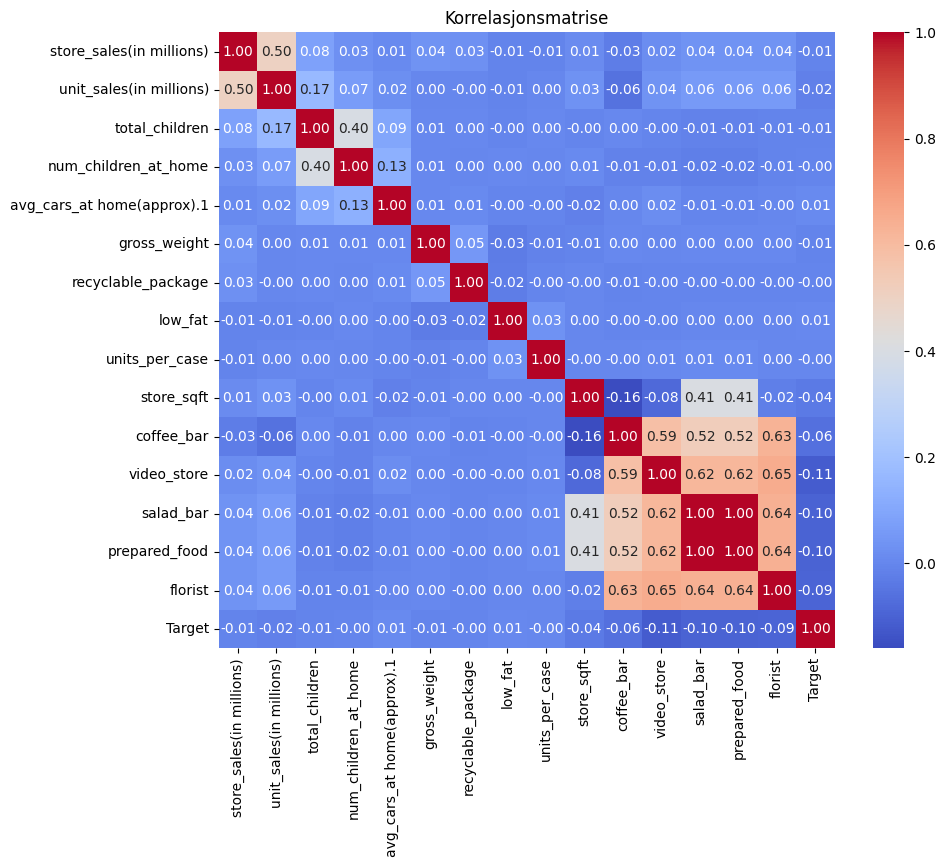

In [4]:
import seaborn as sns

def korrelasjonsmatrise(X, y):
    X_temp = X.copy()
    X_temp['Target'] = y  # Legg til target i matrisa
    correlation_matrix = X_temp.corr()  # Beregn korrelasjon
    
    # Visualiser korrelasjonsmatrisen
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Korrelasjonsmatrise")
    plt.show()

# Kjør funksjonen
korrelasjonsmatrise(X_train, y_train)


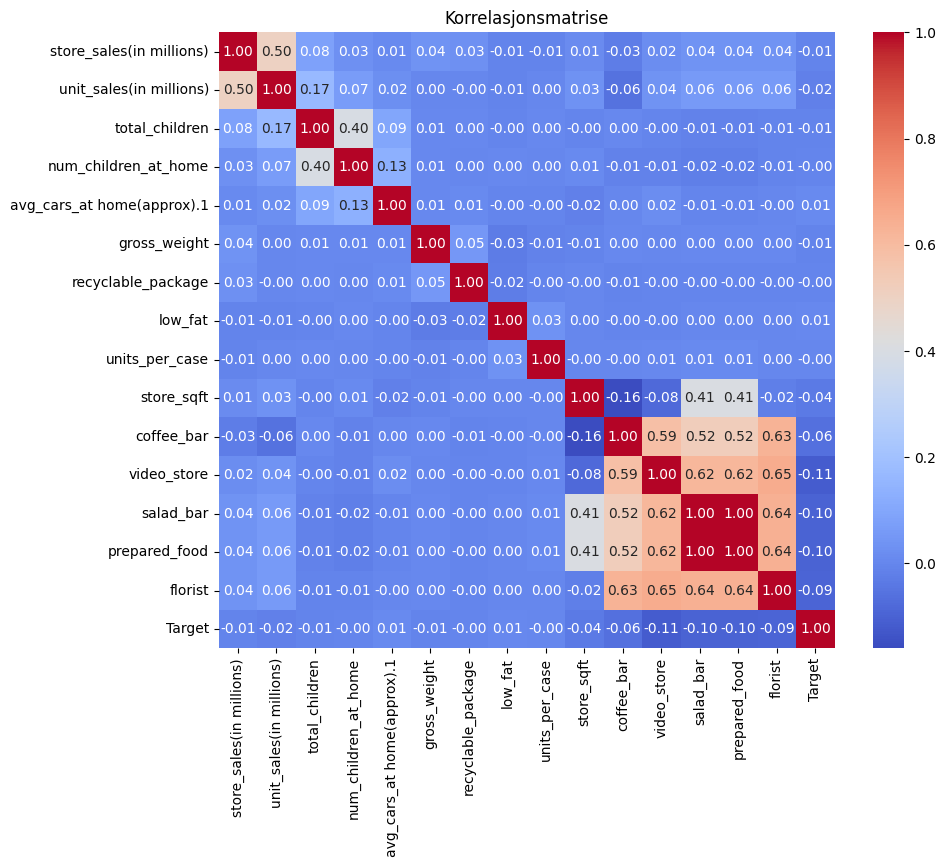

In [5]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

Når man ser på korrelasjonsmatrisen, kan man identifisere egenskaper med høy korrelasjon med Target. Dersom en eller flere variabler har en korrelasjonsverdi nær +1 eller -1 med Target, kan dette indikere en sterk sammenheng med målet vårt. Egenskaper med høy positiv eller negativ korrelasjon kan være særlig nyttige å inkludere som prediktorer i modellen.

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [6]:
#TODO: Utfør hyperparametersøk for en modell
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definer modellen
model = RandomForestRegressor(random_state=0)

# Definer hyperparametrene som skal testes
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Utfør grid search med kryssvalidering
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Vis de beste parametrene og skåren
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Beste hyperparametre:", best_params)
print("Beste skår (MSE):", -best_score)


Beste hyperparametre: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Beste skår (MSE): 851.2053181614632


**Svar:**

Den beste kombinasjonen av hyperparametere ga en MSE på 851.21. Denne modellen oppnådde den laveste gjennomsnittlige kvadratiske feilen blant de testede kombinasjonene, og derfor forventes den å prestere bedre på testdataene også. De valgte hyperparametrene var: max_depth: 10, min_samples_split: 5, og n_estimators: 100. Jeg valgte "neg_mean_squared_error" som metrikk fordi den vektlegger store feil sterkere, noe som er nyttig i regresjonsproblemer der store avvik kan ha betydelig innvirkning på prediksjonsnøyaktigheten, og dermed hjelpe med å oppnå en modell som gir realistiske kostnadsestimater for mediekampanjene.

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [7]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

from sklearn.ensemble import RandomForestRegressor

# Anta at du valgte RandomForestRegressor som "best_model"
best_model = RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=100, random_state=0)


# Opprett en krysvalideringsstrategi med minst K=5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# List for å lagre MAE og MSE for hver fold
mae_scores = []
mse_scores = []

# Gjør kryssvalidering
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Tren modellen på treningsfolden
    best_model.fit(X_train_fold, y_train_fold)

    # Prediksjoner på valideringsfolden
    y_val_pred = best_model.predict(X_val_fold)

    # Beregn MAE og MSE, og legg til i listene
    mae_scores.append(mean_absolute_error(y_val_fold, y_val_pred))
    mse_scores.append(mean_squared_error(y_val_fold, y_val_pred))

# Print resultater for hver fold
print("MAE for hver fold:", mae_scores)
print("MSE for hver fold:", mse_scores)


MAE for hver fold: [np.float64(25.124780723854116), np.float64(25.07467589838468), np.float64(24.973403061096192), np.float64(25.12005020695794), np.float64(25.13803578305754)]
MSE for hver fold: [np.float64(848.5549031234253), np.float64(845.9853598038916), np.float64(848.5484264362589), np.float64(853.4311200104826), np.float64(853.1018405935607)]


In [8]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent
# Beregn gjennomsnitt og standardavvik
mae_mean = np.mean(mae_scores)
mae_std = np.std(mae_scores)
mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)

# Gjennomsnittlig verdi for target (kampanjekostnader) i treningsdataene
avg_target = np.mean(y_train)

# Beregn gjennomsnittlig feil som prosent av gjennomsnittlig faktisk verdi
mae_percent_error = (mae_mean / avg_target) * 100

# Skriv ut resultater
print(f"Gjennomsnittlig MAE: {mae_mean:.2f}, Standardavvik: {mae_std:.2f}")
print(f"Gjennomsnittlig MSE: {mse_mean:.2f}, Standardavvik: {mse_std:.2f}")
print(f"Den gjennomsnittlige MAE-feilen utgjør {mae_percent_error:.2f}% av gjennomsnittlig faktisk pris.")


Gjennomsnittlig MAE: 25.09, Standardavvik: 0.06
Gjennomsnittlig MSE: 849.92, Standardavvik: 2.89
Den gjennomsnittlige MAE-feilen utgjør 25.25% av gjennomsnittlig faktisk pris.


**Svar:**

Resultatene fra kryssvalideringen viser en gjennomsnittlig MSE på 849.92 med et standardavvik på 2.89, og en gjennomsnittlig MAE på 25.09 med et standardavvik på 0.06. Den gjennomsnittlige prediksjonsfeilen, sammenlignet med den faktiske gjennomsnittsprisen i treningsdataene, utgjør 25.25% av gjennomsnittlig faktisk pris. Dette resultatet indikerer at modellen har en rimelig god nøyaktighet i sine kostnadsestimater. MAE-verdien gir en direkte tolkning av modellen sin gjennomsnittlige feil i kampanjekostnader, noe som er verdifullt for å kunne vurdere modellens praktiske anvendelse.

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [9]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene
# Tren modellen på hele treningssettet
best_model.fit(X_train, y_train)

# Gjør prediksjon på testsettet
y_pred = best_model.predict(X_test)

# Beregn MAE og MSE på testsettet
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE) på testsettet:", mae_test)
print("Mean Squared Error (MSE) på testsettet:", mse_test)


Mean Absolute Error (MAE) på testsettet: 25.110709216183896
Mean Squared Error (MSE) på testsettet: 847.9613321195757


**Svar:**

Modellen oppnådde en MAE på testsettet på (Mean Absolute Error (MAE) på testsettet: 25.110709216183896
) og en MSE på (Mean Squared Error (MSE) på testsettet: 847.9613321195757
). Den gjennomsnittlige prediksjonsfeilen sammenlignet med den faktiske gjennomsnittsprisen i testdataene viser at modellen er relativt nøyaktig, men det er rom for forbedringer hvis mer avanserte modeller eller mer data blir tilgjengelig. Den totale MSE indikerer at modellen klarer å forutsi kampanjekostnader med en feil som er akseptabel for våre behov.